<a href="https://colab.research.google.com/github/Yashpatil25/DL-Project/blob/main/DL_Project_5_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 72% 117M/163M [00:00<00:00, 1.22GB/s]
100% 163M/163M [00:00<00:00, 701MB/s] 


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2912.jpg', 'with_mask_1133.jpg', 'with_mask_1311.jpg', 'with_mask_192.jpg', 'with_mask_3274.jpg']
['with_mask_993.jpg', 'with_mask_3208.jpg', 'with_mask_1751.jpg', 'with_mask_46.jpg', 'with_mask_1239.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_756.jpg', 'without_mask_1872.jpg', 'without_mask_949.jpg', 'without_mask_3186.jpg', 'without_mask_3801.jpg']
['without_mask_215.jpg', 'without_mask_258.jpg', 'without_mask_2469.jpg', 'without_mask_1638.jpg', 'without_mask_1818.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

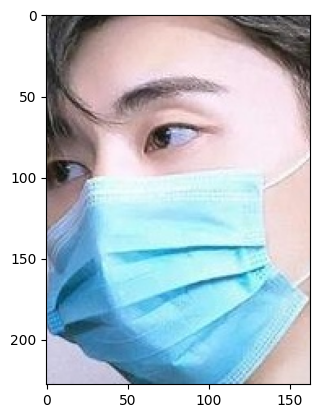

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

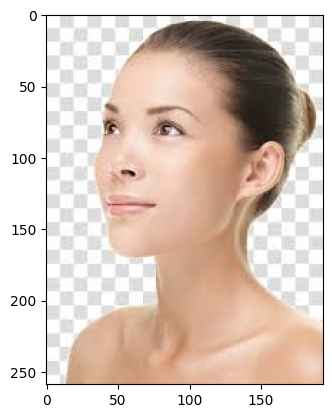

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[156, 143,  98],
        [156, 143,  98],
        [156, 143,  98],
        ...,
        [223, 221, 204],
        [226, 222, 201],
        [172, 158, 132]],

       [[158, 145, 100],
        [158, 145, 100],
        [158, 145, 100],
        ...,
        [222, 220, 202],
        [225, 221, 201],
        [172, 158, 132]],

       [[160, 147, 102],
        [160, 147, 102],
        [160, 147, 102],
        ...,
        [220, 218, 201],
        [225, 221, 200],
        [171, 157, 131]],

       ...,

       [[  8,  13,  11],
        [  9,  12,  11],
        [ 11,  10,   9],
        ...,
        [ 93,  87,  68],
        [ 43,  34,  15],
        [ 95,  79,  60]],

       [[  7,  16,  10],
        [  8,  14,  10],
        [  8,  11,  10],
        ...,
        [100,  92,  73],
        [ 42,  32,  14],
        [ 80,  66,  48]],

       [[ 17,  22,  14],
        [ 15,  18,  13],
        [ 11,  13,  12],
        ...,
        [110, 102,  81],
        [ 46,  36,  17],
        [ 73,  61,  44]]], dtype=uint8)
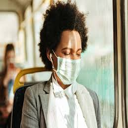

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[147, 198, 233],
        [154, 202, 237],
        [159, 204, 237],
        ...,
        [  1,  66, 106],
        [  0,  64, 102],
        [  0,  64, 100]],

       [[163, 206, 238],
        [170, 210, 238],
        [151, 200, 234],
        ...,
        [  1,  65, 105],
        [  0,  64, 101],
        [  0,  63,  99]],

       [[173, 210, 240],
        [164, 205, 234],
        [135, 194, 231],
        ...,
        [  0,  65, 103],
        [  0,  62, 100],
        [  0,  61,  98]],

       ...,

       [[  1, 114, 186],
        [  1, 116, 186],
        [  1, 117, 185],
        ...,
        [104, 178, 232],
        [ 87, 167, 226],
        [ 71, 162, 226]],

       [[  0, 116, 187],
        [  0, 118, 188],
        [  0, 118, 185],
        ...,
        [ 96, 174, 229],
        [ 89, 170, 227],
        [ 76, 162, 226]],

       [[  0, 117, 187],
        [  0, 120, 189],
        [  0, 119, 186],
        ...,
        [ 96, 174, 229],
        [ 89, 172, 227],
        [ 86, 166, 223]]], dtype=uint8)
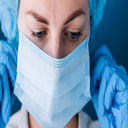

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.57647059, 0.77647059, 0.91372549],
        [0.60392157, 0.79215686, 0.92941176],
        [0.62352941, 0.8       , 0.92941176],
        ...,
        [0.00392157, 0.25882353, 0.41568627],
        [0.        , 0.25098039, 0.4       ],
        [0.        , 0.25098039, 0.39215686]],

       [[0.63921569, 0.80784314, 0.93333333],
        [0.66666667, 0.82352941, 0.93333333],
        [0.59215686, 0.78431373, 0.91764706],
        ...,
        [0.00392157, 0.25490196, 0.41176471],
        [0.        , 0.25098039, 0.39607843],
        [0.        , 0.24705882, 0.38823529]],

       [[0.67843137, 0.82352941, 0.94117647],
        [0.64313725, 0.80392157, 0.91764706],
        [0.52941176, 0.76078431, 0.90588235],
        ...,
        [0.        , 0.25490196, 0.40392157],
        [0.        , 0.24313725, 0.39215686],
        [0.        , 0.23921569, 0.38431373]],

       ...,

       [[0.00392157, 0.44705882, 0.72941176],
        [0.00392157, 0.45490196, 0.72941176],
        [0.00392157, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - acc: 0.7059 - loss: 0.6165 - val_acc: 0.8545 - val_loss: 0.3575
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8888 - loss: 0.2826 - val_acc: 0.8744 - val_loss: 0.2963
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9019 - loss: 0.2518 - val_acc: 0.8909 - val_loss: 0.2773
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9241 - loss: 0.1918 - val_acc: 0.9008 - val_loss: 0.2668
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9348 - loss: 0.1702 - val_acc: 0.9058 - val_loss: 0.3313


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9266 - loss: 0.2396
Test Accuracy = 0.9245532751083374


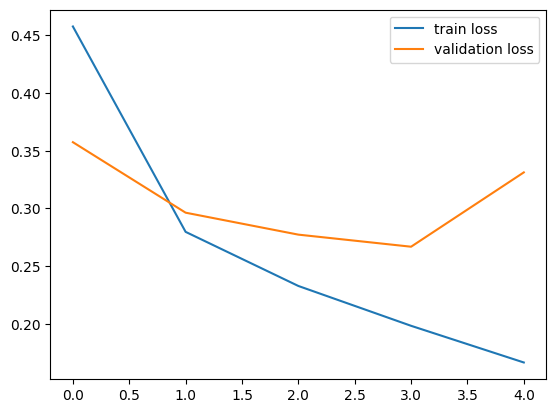

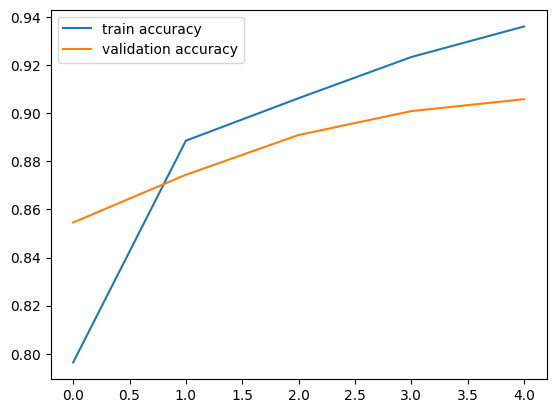

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.jpg


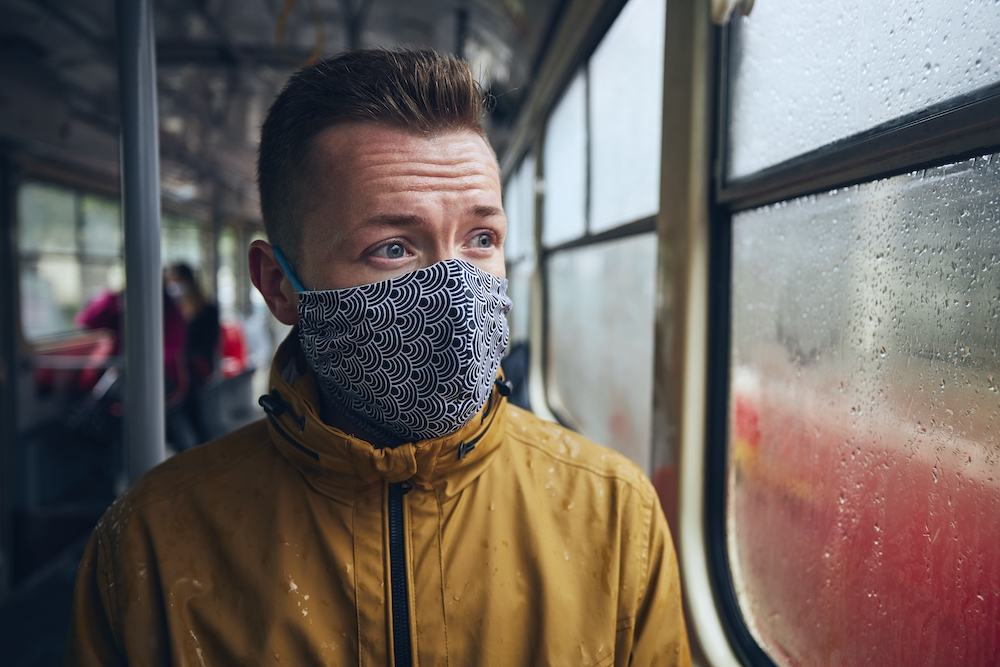

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
[[0.0608198 0.9556153]]
1
The person in the image is wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/textw.png


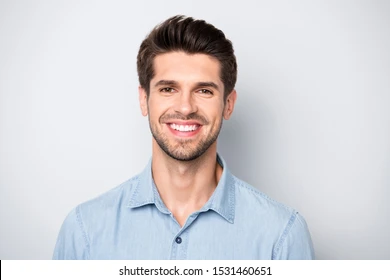

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.2349386 0.7758034]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')